In [1]:
import numpy as np
import matplotlib.pyplot as plt

This is a function to create the spiral.

In [16]:
NORTH, S, W, E = (0, -1), (0, 1), (-1, 0), (1, 0) # directions
turn_right = {NORTH: E, E: S, S: W, W: NORTH} # old -> new direction

def spiral(n):
    if n < 1 or n % 2 == 0:
        return 'You can only input odd numbers, please try again.'
    x, y = n // 2, n // 2
    dx, dy = NORTH 
    matrix = [[None] * n for _ in range(n)]
    count = 0
    while True:
        count += 1
        matrix[y][x] = count 
        new_dx, new_dy = turn_right[dx,dy]
        new_x, new_y = x + new_dx, y + new_dy
        if (0 <= new_x < n and 0 <= new_y < n and
            matrix[new_y][new_x] is None):
            x, y = new_x, new_y
            dx, dy = new_dx, new_dy
        else: 
            x, y = x + dx, y + dy
            if not (0 <= x < n and 0 <= y < n):
                return matrix 

This function adds the elements of the bottom right diagonal to an array and prints them.

In [3]:
def bottom_right_diagonal(matrix):
    n = len(matrix)
    diagonals = []
    for i in range(n):
        for j in range(n):
            if i == n - j - 1 and i <= n // 2: 
                diagonal_element = matrix[i][j]
                
                diagonals.append(diagonal_element)
    print(f"The bottom right diagonal in the {n} x {n} matrix is:",diagonals)

## Elements in the botton right diagonal

In [4]:
bottom_right_diagonal(spiral(3))
bottom_right_diagonal(spiral(5))
bottom_right_diagonal(spiral(7))
bottom_right_diagonal(spiral(9))

The bottom right diagonal in the 3 x 3 matrix is: [9, 1]
The bottom right diagonal in the 5 x 5 matrix is: [25, 9, 1]
The bottom right diagonal in the 7 x 7 matrix is: [49, 25, 9, 1]
The bottom right diagonal in the 9 x 9 matrix is: [81, 49, 25, 9, 1]


In [5]:
def top_left_diagonal(matrix):
    n = len(matrix)
    diagonals = []
    for i in range(n):
        for j in range(n):
            if i == n - j - 1  and i >= n // 2: 
                diagonal_element = matrix[i][j]
                
                diagonals.append(diagonal_element)
    print(f"The top left diagonal in the {n} x {n} matrix is:",diagonals)

## Elements in the top left diagonal

In [6]:
top_left_diagonal(spiral(9))

The top left diagonal in the 9 x 9 matrix is: [1, 5, 17, 37, 65]


This code puts all the elements from the diagonals of a spiral into an array and adds them all together.

In [7]:
def sum_diagonals(matrix):
    n = len(matrix)
    diagonals = []
    for i in range(n):
        for j in range(n):
            if i == n - j - 1 and i <= n // 2: 
                diagonal_element = matrix[i][j]
                if diagonal_element not in diagonals:
                    diagonals.append(diagonal_element)
                
    for i in range(n):
        for j in range(n):
            if i == j and i <= n // 2: 
                diagonal_element = matrix[i][j]
                if diagonal_element not in diagonals:
                    diagonals.append(diagonal_element)
    
    for i in range(n):
        for j in range(n):
            if i == j  and i >= n // 2: 
                diagonal_element = matrix[i][j]
                if diagonal_element not in diagonals:
                    diagonals.append(diagonal_element)
                
    for i in range(n):
        for j in range(n):
            if i == n - j - 1  and i >= n // 2: 
                diagonal_element = matrix[i][j]
                if diagonal_element not in diagonals:
                    diagonals.append(diagonal_element)
    total = sum(diagonals)
    
    return total

## Sum of diagonals in $101 \times 101$ spiral

In [8]:
print(sum_diagonals(spiral(101)))

692101


In [9]:
odds = []
for num in range(1, 102):
    if num % 2 != 0:
        odds.append(num)

This code plots the sum of the diagonals against the size of the array.

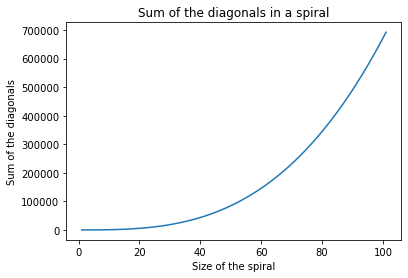

In [10]:
sums = []
for num in odds:
    sums.append(sum_diagonals(spiral(num)))

# Plot the sums of the diagonals
plt.plot(odds, sums)
plt.xlabel('Size of the spiral')
plt.ylabel('Sum of the diagonals')
plt.title('Sum of the diagonals in a spiral')
plt.show()


This function prints the spiral

In [11]:
def swap_rows(matrix):
    n = len(matrix)
    for i in range(n//2):
        matrix[i], matrix[n-i-1] = matrix[n-i-1], matrix[i]
    return matrix

def print_matrix(matrix):
    matrix = swap_rows(matrix)
    width = len(str(max(el for row in matrix for el in row if el is not None)))
    fmt = "{:0%dd}" % width
    for row in matrix:
        print(" ".join("_"*width if el is None else fmt.format(el) for el in row))


## $3 \times 3$ spiral

In [12]:
print_matrix(spiral(3))

5 4 3
6 1 2
7 8 9


## $5 \times 5$ spiral

In [15]:
print_matrix(spiral(5))

17 16 15 14 13
18 05 04 03 12
19 06 01 02 11
20 07 08 09 10
21 22 23 24 25


## $21 \times 21$ spiral

In [14]:
print_matrix(spiral(21))

401 400 399 398 397 396 395 394 393 392 391 390 389 388 387 386 385 384 383 382 381
402 325 324 323 322 321 320 319 318 317 316 315 314 313 312 311 310 309 308 307 380
403 326 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 306 379
404 327 258 197 196 195 194 193 192 191 190 189 188 187 186 185 184 183 240 305 378
405 328 259 198 145 144 143 142 141 140 139 138 137 136 135 134 133 182 239 304 377
406 329 260 199 146 101 100 099 098 097 096 095 094 093 092 091 132 181 238 303 376
407 330 261 200 147 102 065 064 063 062 061 060 059 058 057 090 131 180 237 302 375
408 331 262 201 148 103 066 037 036 035 034 033 032 031 056 089 130 179 236 301 374
409 332 263 202 149 104 067 038 017 016 015 014 013 030 055 088 129 178 235 300 373
410 333 264 203 150 105 068 039 018 005 004 003 012 029 054 087 128 177 234 299 372
411 334 265 204 151 106 069 040 019 006 001 002 011 028 053 086 127 176 233 298 371
412 335 266 205 152 107 070 041 020 007 008 009 010 027 052 085 126 175 232 